# Stock Market Analysis

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


### Import Data CSV to DataFrame

In [3]:
df = pd.read_csv('dataset/HistoricalQuotes.csv')

### EDA (Exploratory Data Analysis)

In [4]:
print(df.columns)
df.describe()
df.info()

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Close/Last  2518 non-null   object
 2   Volume      2518 non-null   int64 
 3   Open        2518 non-null   object
 4   High        2518 non-null   object
 5   Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


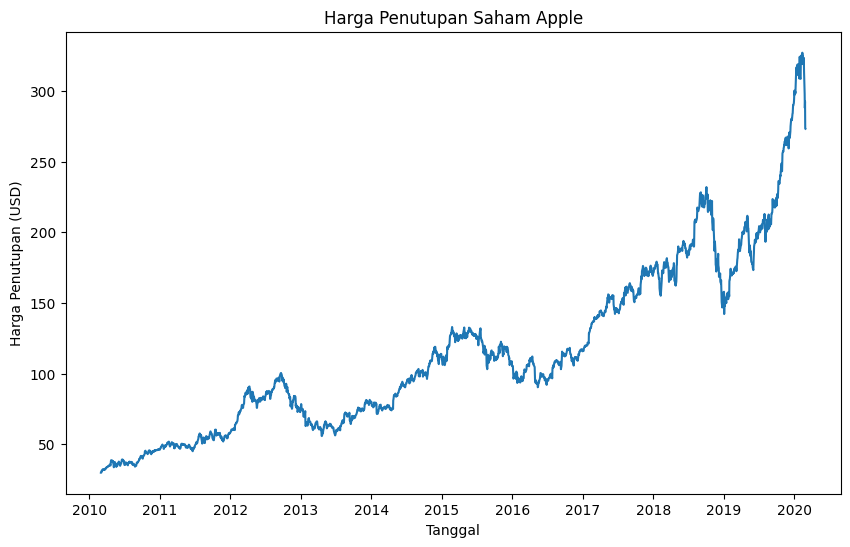

In [5]:
# Parsing kolom Date dan urutkan berdasarkan tanggal
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Hanya menggunakan kolom yang kita butuhkan
df = df[['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# Ubah 'Close/Last' ke format numerik
df_numerik = df[['Close/Last', 'Volume', 'Open', 'High', 'Low']].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Visualisasi data harga penutupan
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df_numerik['Close/Last'])
plt.title('Harga Penutupan Saham Apple')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.show()


### Scale

In [6]:
# Normalisasi data (skalakan nilai ke rentang 0 dan 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_numerik[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

# Tentukan variabel target (y) adalah harga penutupan (Close/Last)
# Fitur input (X) adalah seluruh kolom
X = df_scaled
y = df_scaled[:, 0]  # Target adalah kolom 'Close/Last'

### Creat Time Forcasting
#### Untuk membuat model CNN-LSTM, kita perlu mengubah data menjadi jendela waktu (misalnya, menggunakan 30 hari terakhir untuk memprediksi harga di hari berikutnya).

In [7]:
# Fungsi untuk membuat jendela waktu
def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(target[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Misalnya, kita menggunakan 30 timesteps
X, y = create_sequences(X, y, time_steps)

# Membagi dataset menjadi training dan test (misalnya 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Cek shape dari hasil split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1966, 60, 5)
X_test shape: (492, 60, 5)


### Create Model CNN-LSTM

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Data Preprocess

In [9]:
# Tentukan subsequence dan timesteps per subsequence
subsequence = 2
timesteps_per_subsequence = time_steps // subsequence  # 30 // 2 = 15 subsequences dengan 2 timesteps

# Ubah data dari [samples, timesteps, features] menjadi [samples, subsequences, timesteps_per_subsequence, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], subsequence, timesteps_per_subsequence, X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], subsequence, timesteps_per_subsequence, X_test.shape[2]))

# Cek shape setelah diubah
print("X_train reshaped shape:", X_train_reshaped.shape)
print("X_test reshaped shape:", X_test_reshaped.shape)


X_train reshaped shape: (1966, 2, 30, 5)
X_test reshaped shape: (492, 2, 30, 5)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0117 - val_loss: 0.0047
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3689e-04 - val_loss: 0.0043
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7665e-04 - val_loss: 0.0035
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7138e-04 - val_loss: 0.0031
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3716e-04 - val_loss: 0.0031
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3984e-04 - val_loss: 0.0026
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.1497e-04 - val_loss: 0.0024
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0151e-04 - val_loss: 0.0020
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7476e-04 - val_loss: 0.0018
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8717e-04 - val_loss: 0.0016
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3204e-04 - val_loss: 0.0014
Epoch 12/50
31/31 ━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 2, 28, 128)     │         2,048 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 2, 14, 128)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 2, 1792)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │       368,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,099 (4.24 MB)

 Trainable params: 370,699 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 741,400 (2.83 MB)

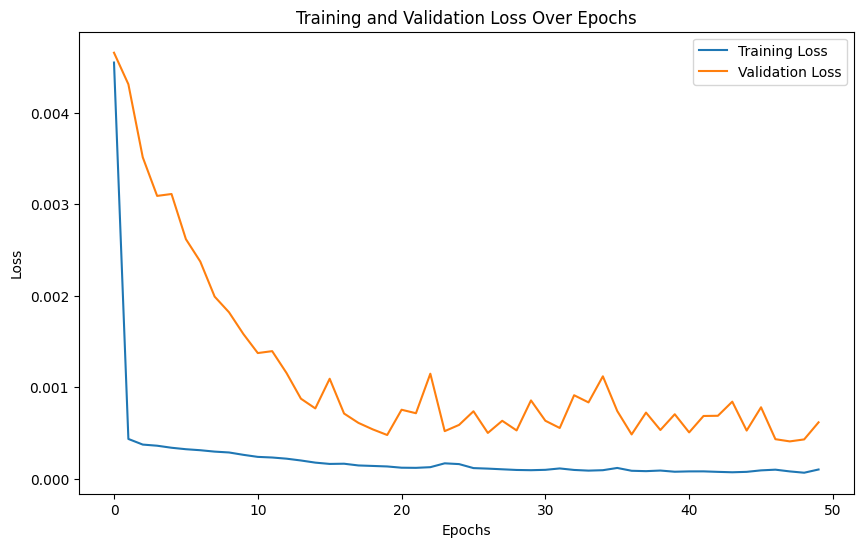

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D, Flatten, LSTM, Dense
import matplotlib.pyplot as plt

# Definisikan model CNN-LSTM
model = Sequential()

# TimeDistributed CNN
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu'), 
                          input_shape=(subsequence, timesteps_per_subsequence, X_train.shape[2])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

# LSTM untuk memproses hasil dari TimeDistributed CNN
model.add(LSTM(50, activation='relu'))

# Output layer untuk prediksi
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Cek ringkasan model
model.summary()

# Visualisasi hasil training (grafik loss)
plt.figure(figsize=(10, 6))

# Plot training loss dan validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Menambahkan judul dan label
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Menampilkan grafik
plt.show()


### Evaluate and Predict

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3964e-04 
Model Test Loss: 0.000616577104665339
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


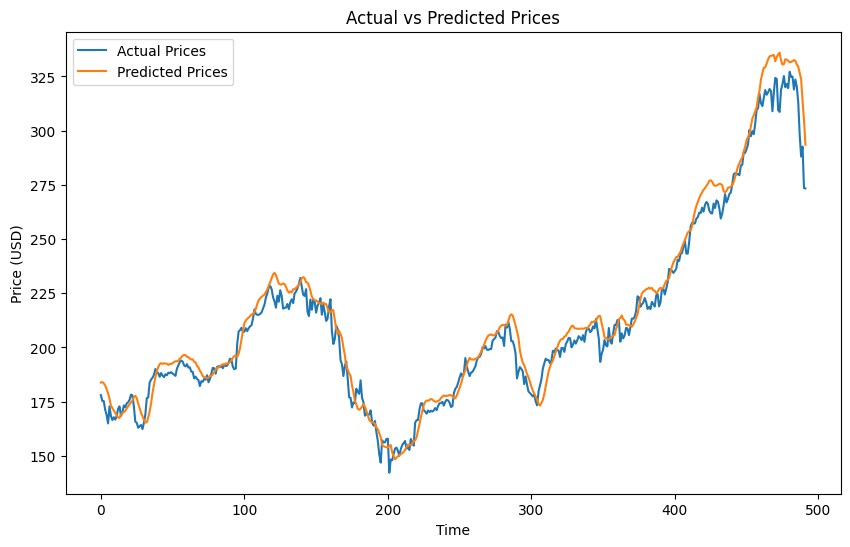

In [12]:
# Evaluasi model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Model Test Loss: {loss}')

# Membuat prediksi
y_pred = model.predict(X_test_reshaped)

# Inversi skala hasil prediksi agar kembali ke skala harga asli
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:,0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], 4))), axis=1))[:,0]

# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Prices')
plt.plot(y_pred_inv, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Future Prediction

### Take last Data for prediction

In [30]:
# Ambil data 30 hari terakhir dari dataset yang sudah dinormalisasi
last_sequence = df_scaled[-time_steps:]

# Reshape data menjadi [1, subsequences, timesteps_per_subsequence, features]
last_sequence_reshaped = last_sequence.reshape((1, subsequence, timesteps_per_subsequence, df_scaled.shape[1]))


In [49]:
# Tentukan jumlah hari yang ingin diprediksi (misalnya, 5 hari ke depan)
future_days = 5
predictions = []

# Mulai dengan data 30 hari terakhir
current_sequence = last_sequence_reshaped

for day in range(future_days):
    # Prediksi harga untuk hari berikutnya
    predicted_price_scaled = model.predict(current_sequence)
    
    # Inversi skala prediksi agar kembali ke skala harga asli
    predicted_price = scaler.inverse_transform(np.concatenate((predicted_price_scaled, np.zeros((1, 4))), axis=1))[:, 0]
    predictions.append(predicted_price[0])
    
    # Ambil subsequence terakhir dari current_sequence
    last_subsequence = current_sequence[:, -1, :, :]  # Ambil subsequence terakhir (dimensi [samples, timesteps, features])

    # Geser timestep, dan tambahkan prediksi terbaru
    new_subsequence = np.concatenate((last_subsequence[:, 1:, :], predicted_price_full.reshape(1, 1, 5)), axis=1)

    # Update current_sequence dengan subsequence yang telah diperbarui
    current_sequence = np.concatenate((current_sequence[:, 1:, :, :], new_subsequence.reshape(1, 1, new_subsequence.shape[1], 5)), axis=1)

# Tampilkan hasil prediksi
print(f"Prediksi harga saham untuk {future_days} hari ke depan: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediksi harga saham untuk 5 hari ke depan: [283.5863273376465, 282.022902859211, 223.73846028125882, 206.65009673630001, 165.889335213086]


#### Predicting the Next Few Days

In [100]:
# Prediksi beberapa hari mendatang (misalnya 5 hari)
future_days = 30
predictions = []

# Mulai dengan data 30 hari terakhir
current_sequence = df_scaled[-time_steps:]

for day in range(future_days):
    # Ubah bentuk data agar sesuai dengan input model
    current_sequence_expanded = np.expand_dims(current_sequence, axis=0)
    
    # Prediksi harga untuk hari berikutnya
    predicted_price_scaled = model.predict(current_sequence_expanded)
    
    # Simpan prediksi yang sudah di-inversi skalanya
    predicted_price = scaler.inverse_transform(np.concatenate((predicted_price_scaled, np.zeros((1, 4))), axis=1))[:,0]
    predictions.append(predicted_price[0])
    
    # Update sequence: tambahkan prediksi terbaru (dengan 5 fitur) dan hapus hari pertama dari sequence
    predicted_price_full = np.concatenate((predicted_price_scaled, np.zeros((1, 4))), axis=1)  # Prediksi dengan placeholder untuk fitur lain
    new_sequence = np.concatenate((current_sequence[1:], predicted_price_full), axis=0)
    current_sequence = new_sequence

# Tampilkan hasil prediksi
print(f"Prediksi harga saham untuk {future_days} hari ke depan: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

#### Future Prediction

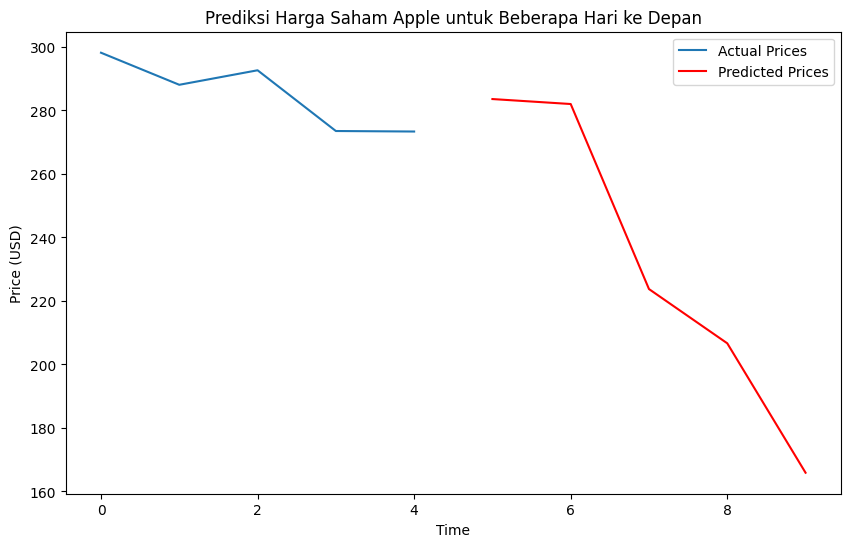

In [54]:
# Ambil harga penutupan asli untuk beberapa hari terakhir (misalnya 60 hari terakhir)
actual_prices = scaler.inverse_transform(df_scaled[-5:, :])[:, 0]

# Panjang dari data historis
historical_length = len(actual_prices)

# Indeks waktu untuk data historis (60 hari terakhir)
historical_time = range(historical_length)

# Indeks waktu untuk prediksi (mulai dari akhir data historis)
future_time = range(historical_length, historical_length + future_days)

# Visualisasi prediksi dan data historis
plt.figure(figsize=(10, 6))

# Plot data historis
plt.plot(historical_time, actual_prices, label='Actual Prices')

# Plot prediksi masa depan
plt.plot(future_time, predictions, label='Predicted Prices', color='red')

plt.title('Prediksi Harga Saham Apple untuk Beberapa Hari ke Depan')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Stock Predict using ARIMA Model

### Uji Stasioneritas Data (Differencing jika Diperlukan)

In [55]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

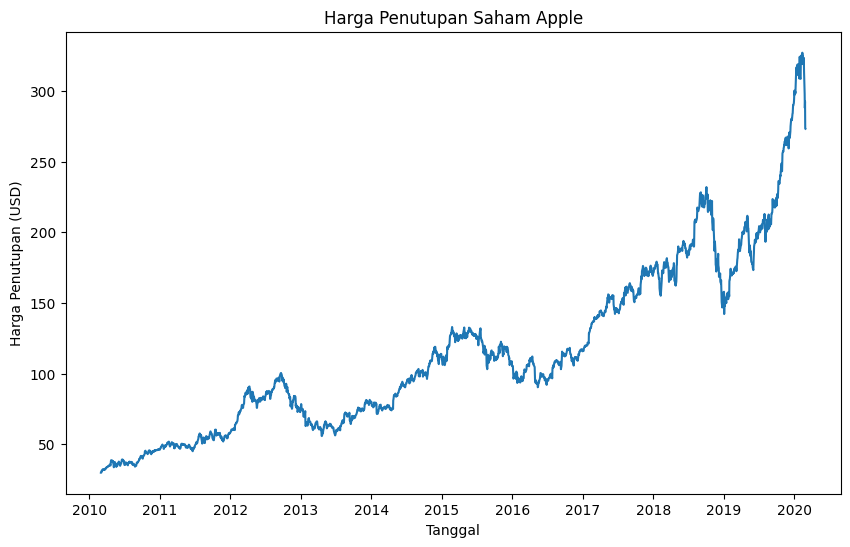

In [56]:
# Baca dataset (ubah path sesuai dengan file Anda)
df = pd.read_csv('dataset/HistoricalQuotes.csv')

# Ubah kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Ambil kolom 'Close/Last' sebagai target time-series
df['Close/Last'] = df['Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)
prices = df['Close/Last']

# Plot harga penutupan untuk melihat trend
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], prices)
plt.title('Harga Penutupan Saham Apple')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.show()

In [82]:
# Uji stasioneritas dengan Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    result = prices.diff().dropna()
    
    if result[1] < 0.05:
        print("Data stasioner (reject H0)")
    else:
        # Lakukan differencing jika data tidak stasioner
        # Uji stasioneritas setelah differencing
        print("Data tidak stasioner (fail to reject H0)")

adf_test(prices)
# adf_test(diff_prices)


ADF Statistic: 0.04918130127669498
p-value: 0.9624152269389331
Data stasioner (reject H0)


### Train ARIMA Model

In [83]:
# Tentukan parameter ARIMA(p, d, q) - misalnya (5, 1, 0)
p, d, q = 5, 1, 0

# Melatih model ARIMA
model = ARIMA(prices, order=(p, d, q))
model_fit = model.fit()

# Tampilkan ringkasan model
print(model_fit.summary())


d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                 2518
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5425.188
Date:                Tue, 17 Sep 2024   AIC                          10862.377
Time:                        15:48:07   BIC                          10897.362
Sample:                             0   HQIC                         10875.073
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0172      0.012      1.468      0.142      -0.006       0.040
ar.L2         -0.0329      0.012     -2.812      0.005      -0.056      -0.010
ar.L3         -0.0212      0.011     -1.924      0.0

### Evaluate and Predict using ARIMA

d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


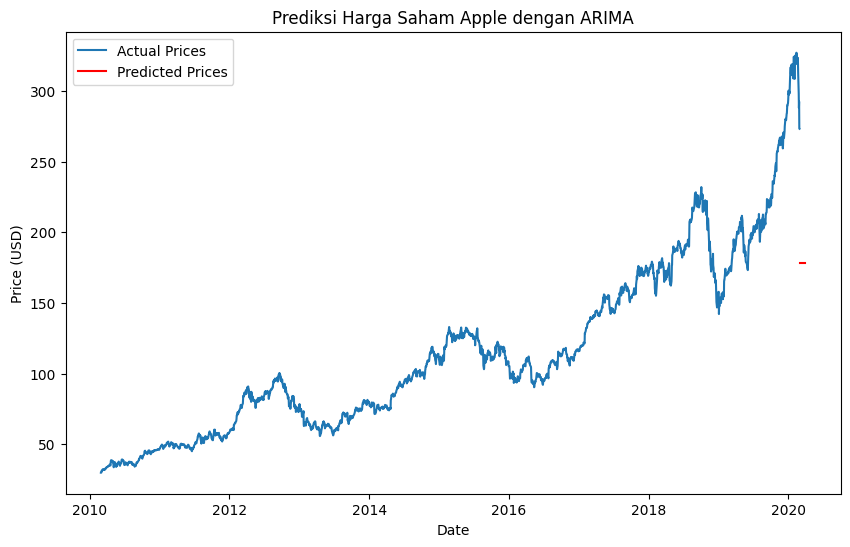

In [87]:
# Melakukan prediksi pada dataset (misalnya 30 hari ke depan)
pred_start_date = len(prices)
pred_end_date = pred_start_date + 30  # Prediksi 30 hari ke depan

forecast = model_fit.predict(start=pred_start_date, end=pred_end_date, typ='levels')

# Visualisasikan prediksi
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], prices, label='Actual Prices')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=32, freq='D')[1:], forecast, label='Predicted Prices', color='red')
plt.title('Prediksi Harga Saham Apple dengan ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [85]:
# Prediksi pada data uji (test) dan hitung MSE
train_size = int(len(prices) * 0.8)
test_size = len(prices) - train_size

train, test = prices[0:train_size], prices[train_size:]

# Fit model pada data training
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Prediksi data uji
predictions = model_fit.forecast(steps=test_size)

# Hitung Mean Squared Error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 2719.778364684235


d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
